# Modeling Disease Transmission 

Does the data reported from Johns Hopkins make sense? 

https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus/coronavirus-disease-2019-vs-the-flu

## The SIR Epidemic Model

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of $N$ individuals into three "compartments" which may vary as a function of time, $t$:

- $S(t)$ are those susceptible but not yet infected with the disease
- $I(t)$ is the number of infectious individuals
- $R(t)$ are those individuals who have recovered from the disease and now have immunity to it.

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $\beta$ and $\gamma$. $\beta$ describes the effective contact rate of the disease: an infected individual comes into contact with $\beta * N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $S/N$). $\beta$ is the mean recovery rate: that is, $1/\gamma$ is the mean period of time during which an infected individual can pass it on.

The cell below is an implmentation of the SIR model.

In [2]:
# This code is adapted from here:
# https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
# Thanks to Christian Hill

import numpy as np
import pandas as pd 
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def deriv(y, t, N, beta, gamma):
    """The SIR differential equations."""
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def do_sim(beta, gamma_1, days=160, population=1000, immune=0, initial_cases=1):
    """
    Do a simulation of the SIR model with the inputs: 

        beta - How likely the disease is passed from one person to another [0, 1]
        gamma_1 - Mean number of days an individual is infectious.

        days - The number of days to calculate. (default 160)
        population - The number of people in the simulation. (default 1000)
        immune - The fraction of the population that is immune. (default 0)
        initial_cases - The number of cases to start with. (default 1)
        
    """
    # Total population, N.
    N = population
    # Initial number of infected and recovered individuals, I0 and R0.
    I0 = initial_cases
    R0 = int(N * immune)
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0
    # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
    gamma = 1 / gamma_1 
    
    # A grid of time points (in days)
    t = np.linspace(0, days, days)

    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    return pd.DataFrame({
        'Susceptible': S, 
        'Infected': I, 
        'Recovered': R,
    })

## COVID-19 vs. The Flu

Let's assume the parameters $β$ and $γ$ for the average flu and COVID-19 are about the same. That it poeple are just as contagious and are infectious for about the same amount of time. The only difference is that about XXX% of the population has already had the flu. 

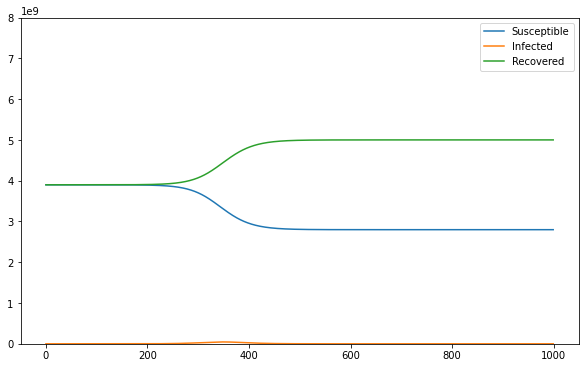

In [8]:
flu = do_sim(0.47, 5, population=7.8e9, immune=0.50, days=1000, initial_cases=1000)
flu.plot(figsize=(10,6), ylim=(0,8e9))

In [7]:
total_flu = int(flu['Recovered'].iloc[-1] - flu['Recovered'].iloc[0])
print('Total flu cases {:,}'.format(total_flu))
print("Maximum simultaneous flu cases: {:,}".format(int(flu['Infected'].max())))

Total flu cases 1,100,950,361
Maximum simultaneous flu cases: 45,576,612


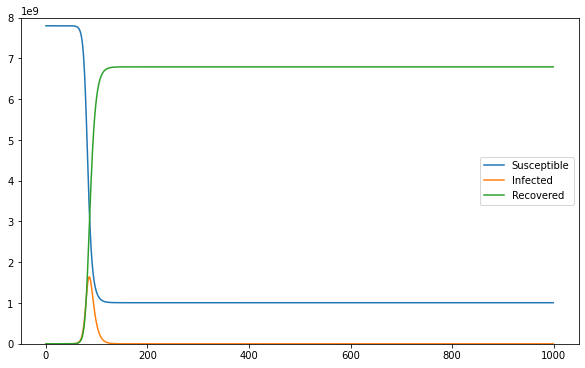

In [101]:
covid = do_sim(0.47, 5, population=7.8e9, days=1000)
covid.plot(figsize=(10,6), ylim=(0,8e9))

In [98]:
total_covid = int(covid['Recovered'].iloc[-1] - covid['Recovered'].iloc[0])
print('Total covid cases {:,}'.format(total_covid))
print("Maximum simultaneous COVID-19 cases: {:,}".format(int(covid['Infected'].max())))

Total covid cases 6,792,220,197
Maximum simultaneous COVID-19 cases: 1,643,598,134


## Comparison of Infections between COVID-19 and the Flu

This graph shows the infected population.

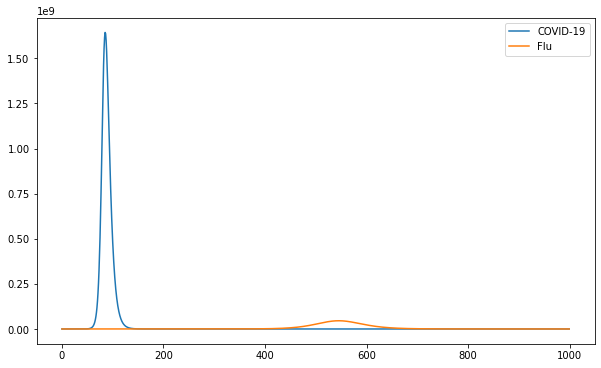

In [102]:
covid_vs_flu = pd.DataFrame({
    'COVID-19': covid['Infected'], 
    'Flu': flu['Infected'],
})
covid_vs_flu.plot(figsize=(10,6))